In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from IPython.display import clear_output
from time import sleep
%matplotlib notebook

In [2]:
# creating the test array
r=[[13, 16], [25, 36], [50, 45], [12, 34], [47, 38], [32, 3], 
   [2, 29], [40, 26], [7, 17], [17, 17], [27, 46], [23, 5] ]

In [3]:
data=np.array(r)
x,y = data[:,0], data[:,1]

In [28]:
def connectpoints(x,y,p1,p2, is_ax=False):
    p1=int(p1)-1
    p2=int(p2)-1
#     print(x,y,p1,p2)
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    if is_ax:
        plt.plot([x1,x2],[y1,y2],'k-')
    else:
        ax.plot([x1,x2],[y1,y2],'k-')

In [5]:
# defining distance function
def distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

In [6]:
# Creating the distance array
# with row 0 and col 0 contains the point's number
dist=[[i for i in range(len(r)+1)]for j in range (len(r)+1)]
for i in range(len(r)):
    dist[i+1][0]=i+1
    for j in range(len(r)):
#         dist[i+1][j+1]=7.5
        dist[i+1][j+1]=distance(r[i][0], r[i][1], r[j][0], r[j][1])

# dist
ndist=np.array(dist)
# ndist

In [7]:
# Results array
res_loc = []
res_val = []

In [8]:
# a copy of ndist
ndc = ndist.copy()

In [9]:
def get_row_num(array, val):
    return np.where( array[:,0] == val)[0][0]

def get_col_num(array, val):
    return np.where( array[0] == val)[0][0]


get_row_num(ndist, 1), get_col_num(ndist, 1)

(1, 1)

In [10]:
point_name =1
rw = 1
# adding the starting point
res_loc.append(ndc[rw][0])

In [11]:
# current row (the starting row)
# rw = 1
rw = point_name
rw = get_row_num(ndc, rw)
# current array
# the slice at the end to remove the point column
curr = ndc[rw][1:]


rw, res_loc, res_val, curr

(1, [1.0], [], array([  0.        ,  23.32380758,  47.01063709,  18.02775638,
         40.49691346,  23.02172887,  17.02938637,  28.7923601 ,
          6.08276253,   4.12310563,  33.10589071,  14.86606875]))

In [12]:
# find the nonzero minimum of the current array

vlu = np.min(curr[np.nonzero(curr)])
lcn = np.where(curr == vlu)[0][0]
point_name = ndc[0,lcn+1]

# appending the results of this stage to the results lists
res_loc.append(point_name)
res_val.append(vlu)
rw, lcn, vlu, point_name

(1, 9, 4.1231056256176606, 10.0)

In [13]:
# deleting the initial row after finding the next column
ndc = np.delete(ndc, rw, axis=0)
ndc = np.delete(ndc, rw, axis=1)
ndc
ndc.shape

(12, 12)

In [14]:
# the current column
cl = get_col_num(ndc, point_name)
# current array
# the slice at the end to remove the point column
curr = ndc[:,cl][1:]

curr

array([ 20.61552813,  43.27817002,  17.72004515,  36.61966685,
        20.51828453,  19.20937271,  24.69817807,  10.        ,
         0.        ,  30.6757233 ,  13.41640786])

In [15]:
# find the nonzero minimum of the current array

vlu = np.min(curr[np.nonzero(curr)])
lcn = np.where(curr == vlu)[0][0]
point_name = ndc[0,lcn+1]
# appending the results of this stage to the results lists
res_loc.append(point_name)
res_val.append(vlu)
cl, lcn, vlu, point_name

(9, 7, 10.0, 9.0)

In [16]:
# deleting the finished column
ndc = np.delete(ndc, cl, axis=1)
ndc = np.delete(ndc, cl, axis=0)
# ndc
# ndc.shape

In [17]:
ndc.shape, res_loc, res_val

((11, 11), [1.0, 10.0, 9.0], [4.1231056256176606, 10.0])

In [18]:
sum(res_val)

14.123105625617661

In [19]:
# Results array
res_loc = []
res_val = []

# a copy of ndist
ndc = ndist.copy()

point_name = 1
res_loc.append(ndc[point_name][0])

while ndc.shape[0]>2:
    rw = get_row_num(ndc, point_name)
    # current array
    # the slice at the end to remove the point column
    curr = ndc[rw][1:]# find the nonzero minimum of the current array

    vlu = np.min(curr[np.nonzero(curr)])
    lcn = np.where(curr == vlu)[0][0]
    point_name = ndc[0,lcn+1]

    # appending the results of this stage to the results lists
    res_loc.append(point_name)
    res_val.append(vlu)
#     print(rw, lcn, vlu, point_name)
    # deleting the initial row after finding the next column
    ndc = np.delete(ndc, rw, axis=0)
    ndc = np.delete(ndc, rw, axis=1)
    #     ndc
    #     ndc.shape
    # the current column
    if ndc.shape[0]<=2:
        break
    cl = get_col_num(ndc, point_name)
    # current array
    # the slice at the end to remove the point column
    curr = ndc[:,cl][1:]
    # find the nonzero minimum of the current array

    vlu = np.min(curr[np.nonzero(curr)])
    lcn = np.where(curr == vlu)[0][0]
    point_name = ndc[0,lcn+1]
    # appending the results of this stage to the results lists
    res_loc.append(point_name)
    res_val.append(vlu)
#     print(cl, lcn, vlu, point_name)
    # deleting the finished column
    ndc = np.delete(ndc, cl, axis=1)
    ndc = np.delete(ndc, cl, axis=0)
#     print(res_loc, res_val)

print(res_loc)
print(res_val)

[1.0, 10.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0, 6.0, 12.0]
[4.1231056256176606, 10.0, 13.0, 11.180339887498949, 13.152946437965905, 10.198039027185569, 21.540659228538015, 7.6157731058639087, 21.470910553583888, 24.351591323771842, 9.2195444572928871]


In [20]:
the_shortest_path =float('inf')
the_results =[]
for starting_point in range(1, len(r)+1):
    # Results array
    res_loc = []
    res_val = []

    # a copy of ndist
    ndc = ndist.copy()

    point_name = starting_point
    res_loc.append(ndc[point_name][0])

    while ndc.shape[0]>2:
        rw = get_row_num(ndc, point_name)
        # current array
        # the slice at the end to remove the point column
        curr = ndc[rw][1:]# find the nonzero minimum of the current array

        vlu = np.min(curr[np.nonzero(curr)])
        lcn = np.where(curr == vlu)[0][0]
        point_name = ndc[0,lcn+1]

        # appending the results of this stage to the results lists
        res_loc.append(point_name)
        res_val.append(vlu)
    #     print(rw, lcn, vlu, point_name)
        # deleting the initial row after finding the next column
        ndc = np.delete(ndc, rw, axis=0)
        ndc = np.delete(ndc, rw, axis=1)
        #     ndc
        #     ndc.shape
        # the current column
        if ndc.shape[0]<=2:
            break
        cl = get_col_num(ndc, point_name)
        # current array
        # the slice at the end to remove the point column
        curr = ndc[:,cl][1:]
        # find the nonzero minimum of the current array

        vlu = np.min(curr[np.nonzero(curr)])
        lcn = np.where(curr == vlu)[0][0]
        point_name = ndc[0,lcn+1]
        # appending the results of this stage to the results lists
        res_loc.append(point_name)
        res_val.append(vlu)
    #     print(cl, lcn, vlu, point_name)
        # deleting the finished column
        ndc = np.delete(ndc, cl, axis=1)
        ndc = np.delete(ndc, cl, axis=0)
    #     print(res_loc, res_val)
    
#     print(res_loc)
#     print(res_val)
    current_path_length = sum(res_val)
    the_results.append((starting_point, current_path_length, res_loc))
    if current_path_length < the_shortest_path:        
        the_shortest_path = current_path_length 
        the_shortest_sequence = res_loc
        best_starting_point = starting_point
    print(f'For point {starting_point} as start, the length will be '
          f'{current_path_length} \n\tand the sequence will be: {res_loc}')
print(f'\nThe best starting point is: {best_starting_point}'
      f'\nThe shortest path length is: {the_shortest_path}'
      f'\nThe shortest sequece is: {the_shortest_sequence}')

For point 1 as start, the length will be 145.85290964731865 
	and the sequence will be: [1.0, 10.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0, 6.0, 12.0]
For point 2 as start, the length will be 132.2893805242761 
	and the sequence will be: [2.0, 11.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0]
For point 3 as start, the length will be 125.96554557782422 
	and the sequence will be: [3.0, 5.0, 8.0, 2.0, 11.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0]
For point 4 as start, the length will be 136.10173667842025 
	and the sequence will be: [4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0, 11.0, 2.0]
For point 5 as start, the length will be 133.54401214195832 
	and the sequence will be: [5.0, 3.0, 8.0, 2.0, 11.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0]
For point 6 as start, the length will be 131.00048871884374 
	and the sequence will be: [6.0, 12.0, 10.0, 1.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0]
For point 7 as start, the length will be 142.3520800426156 
	and the sequence will be: [7

In [21]:
the_shortest_sequence

[8.0, 5.0, 3.0, 11.0, 2.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0]

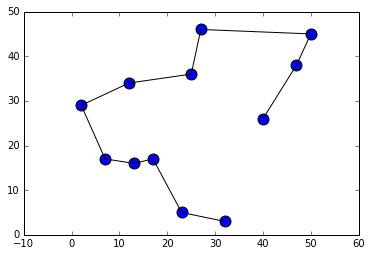

In [22]:
plt.scatter(x, y, s=120)
for i, point in enumerate(the_shortest_sequence):
    if i == len(r)-1:
        break
#     print(i, point, the_shortest_sequence[i+1])
    connectpoints(x,y, point, the_shortest_sequence[i+1])
# connectpoints(x,y, 8, 5)

In [23]:
for result in the_results:
    print(result)

(1, 145.85290964731865, [1.0, 10.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0, 6.0, 12.0])
(2, 132.28938052427611, [2.0, 11.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0])
(3, 125.96554557782422, [3.0, 5.0, 8.0, 2.0, 11.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0])
(4, 136.10173667842025, [4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0, 11.0, 2.0])
(5, 133.54401214195832, [5.0, 3.0, 8.0, 2.0, 11.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0])
(6, 131.00048871884374, [6.0, 12.0, 10.0, 1.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0])
(7, 142.3520800426156, [7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0, 6.0, 12.0, 10.0, 1.0, 9.0])
(8, 124.90309179261432, [8.0, 5.0, 3.0, 11.0, 2.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0])
(9, 136.25468311638616, [9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0, 11.0, 2.0, 4.0, 7.0])
(10, 141.93567217761688, [10.0, 1.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0, 6.0, 12.0])
(11, 126.23295424994348, [11.0, 2.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0])
(12, 138.10236538252

In [24]:
tr=sorted(the_results, key=itemgetter(1), reverse=True)
tr

[(1,
  145.85290964731865,
  [1.0, 10.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0, 6.0, 12.0]),
 (7,
  142.3520800426156,
  [7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0, 6.0, 12.0, 10.0, 1.0, 9.0]),
 (10,
  141.93567217761688,
  [10.0, 1.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0, 6.0, 12.0]),
 (12,
  138.10236538252821,
  [12.0, 6.0, 10.0, 1.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0]),
 (9,
  136.25468311638616,
  [9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0, 11.0, 2.0, 4.0, 7.0]),
 (4,
  136.10173667842025,
  [4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0, 11.0, 2.0]),
 (5,
  133.54401214195832,
  [5.0, 3.0, 8.0, 2.0, 11.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0]),
 (2,
  132.28938052427611,
  [2.0, 11.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0]),
 (6,
  131.00048871884374,
  [6.0, 12.0, 10.0, 1.0, 9.0, 7.0, 4.0, 2.0, 11.0, 5.0, 3.0, 8.0]),
 (11,
  126.23295424994348,
  [11.0, 2.0, 4.0, 7.0, 9.0, 1.0, 10.0, 12.0, 6.0, 8.0, 5.0, 3.0]),
 (3,
  125.96554557782422,
  [3.0, 5.0, 8.0, 2.0

In [38]:
# for result in the_results:
#     title= f'Starting from point {result[0]} The shortest path will be {result[1]} units.'
#     plt.scatter(x, y, s=120)
#     for i, point in enumerate(result[2]):
#         if i == len(r)-1:
#             break
#     #     print(i, point, the_shortest_sequence[i+1])
#         connectpoints(x,y, point, result[i+1])
# #     sleep(1)
# #     plt.draw
# #     clear_output(wait=False)
# #     plt.close

<IPython.core.display.Javascript object>


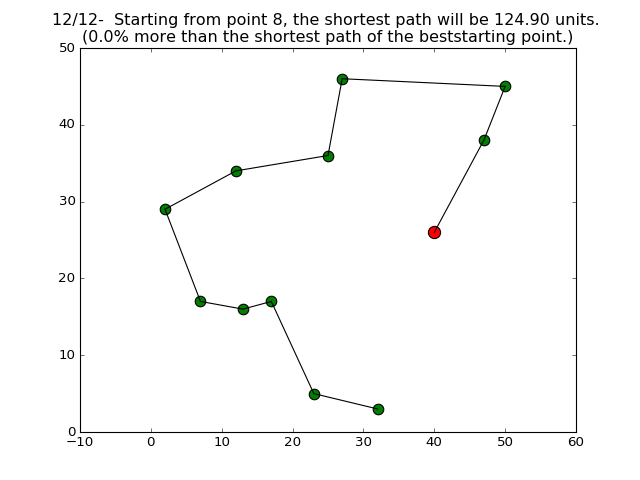

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
n_points= len(tr)
shortest_path = tr[n_points-1][1]
for j, result in enumerate(tr):
    ax.clear()
    ratio =  int((result[1] - shortest_path) / shortest_path * 10000)/100.0
    title = f'{j+1}/{n_points}-  Starting from point {result[0]},'\
            f' the shortest path will be {result[1]:6.2f} units. '\
            f'\n({ratio}% more than the shortest path of the best'\
            'starting point.)'
    ax.scatter(x, y, s=90,c='g')
    xp, yp = r[result[0]-1]
    ax.scatter(xp, yp, s=120,c='r')
    for i, point in enumerate(result[2]):
        if i == len(r)-1:
            break
        connectpoints(x,y, point, result[2][i+1])
        fig.canvas.draw()
        sleep(0.1)
    plt.title(title)
    fig.canvas.draw()
    sleep(2)

In [48]:
ww=124.352619742456841
print(f'The value is {ww:6.2f} km/h')

The value is 124.35 km/h


In [62]:
print(f'The value is {ww:6.2f} km/h'
     'er errt gdfgvadgasdfgvv'
     f'3afdvsvs{ww:6.2f}dfvcv ')

The value is 124.35 km/her errt gdfgvadgasdfgvv3afdvsvs124.35dfvcv 


In [64]:
qaqa='The value is {ww:6.2f} km/h'\
     'er errt gdfgvadgasdfgvv'\
     f'3afdvsv{ww:6.2f}sdfvcv '
print(qaqa)

The value is {ww:6.2f} km/her errt gdfgvadgasdfgvv3afdvsv124.35sdfvcv 
